In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
file_path = '/Users/oindrikar/Desktop/ML/Project/Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Data Manipulation

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
missing_values = df.isnull().sum()
print(missing_values)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [11]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
# Impute missing values for numeric columns with their mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# For categorical columns, you might impute missing values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Check if there are any remaining missing values
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
df = df.drop(['customerID'], axis = 1)

In [14]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                         'PaperlessBilling', 'PaymentMethod']

Data Visualization

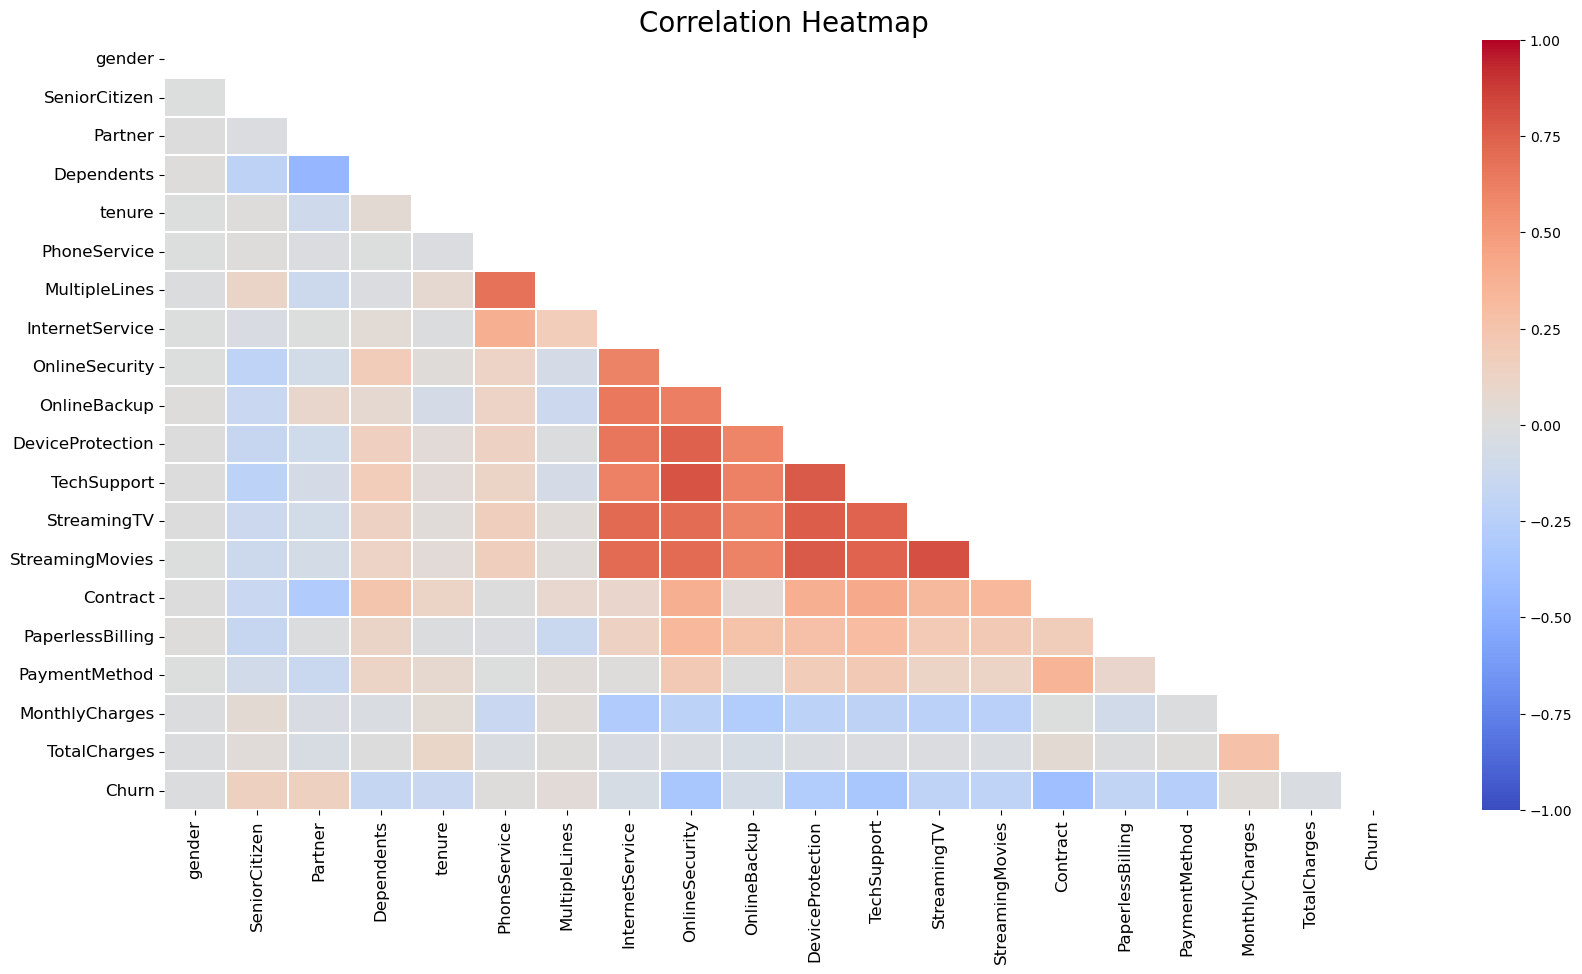

In [15]:
plt.figure(figsize=(20, 10))  # Increase figure size for better visibility

# Calculate correlation matrix
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns,
                 annot=True, fmt='.2f', linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Increase font size for better readability
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

#ax.set_aspect("equal")

plt.title('Correlation Heatmap', fontsize=20)  
plt.show()

In [16]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()
#About half of the customers in our data set are male while the other half are female

Text(0.5, 1.0, '% of Senior Citizens')

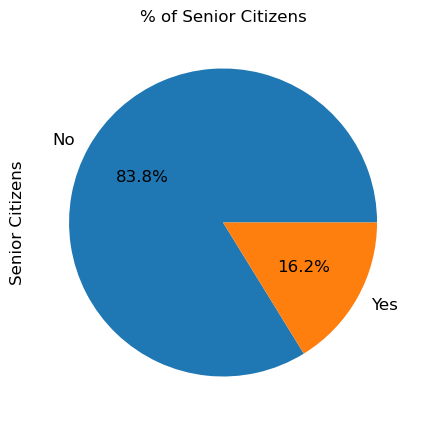

In [17]:
import matplotlib.ticker as mtick
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)
#There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

Text(0.5, 1.0, 'Number of Customers by Contract Type')

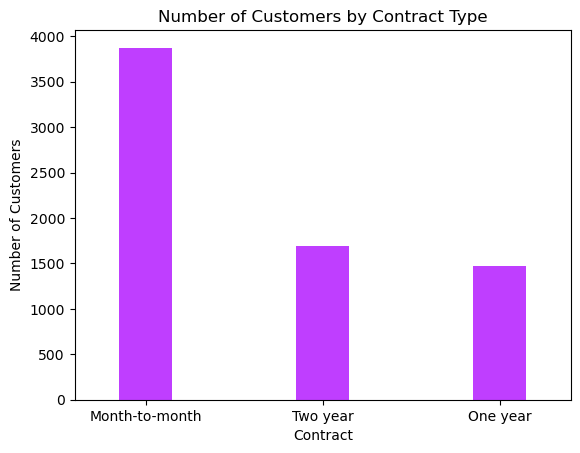

In [18]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color='#BF3EFF')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')
#As we can see from this graph most of the customers are in the month to month contract. 
#While there are equal number of customers in the 1 year and 2 year contracts.

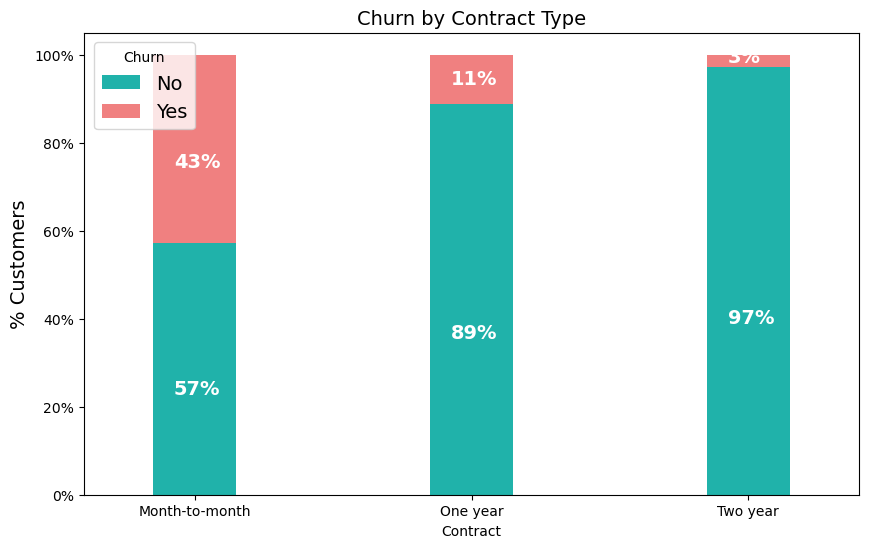

In [19]:
colors = ['#20B2AA','#F08080']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)
 #Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

In [20]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [21]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Major customers who moved out were having Electronic Check as Payment Method. Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

Text(0.5, 1.0, 'Distribution of total charges by churn')

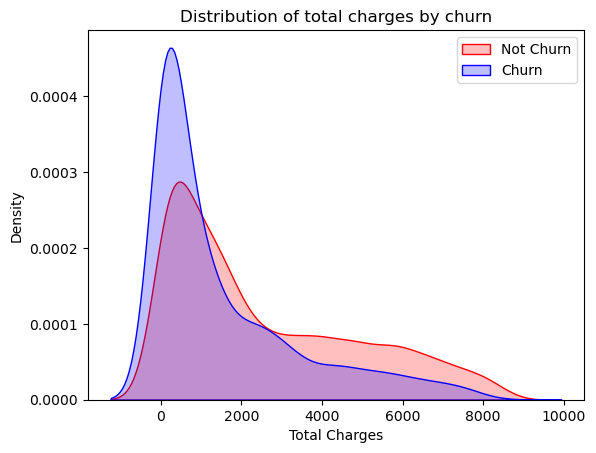

In [22]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

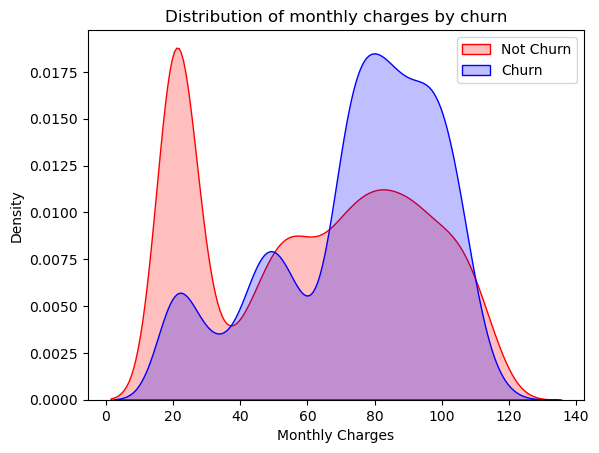

In [23]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
#Higher % of customers churn when the monthly charges are high.

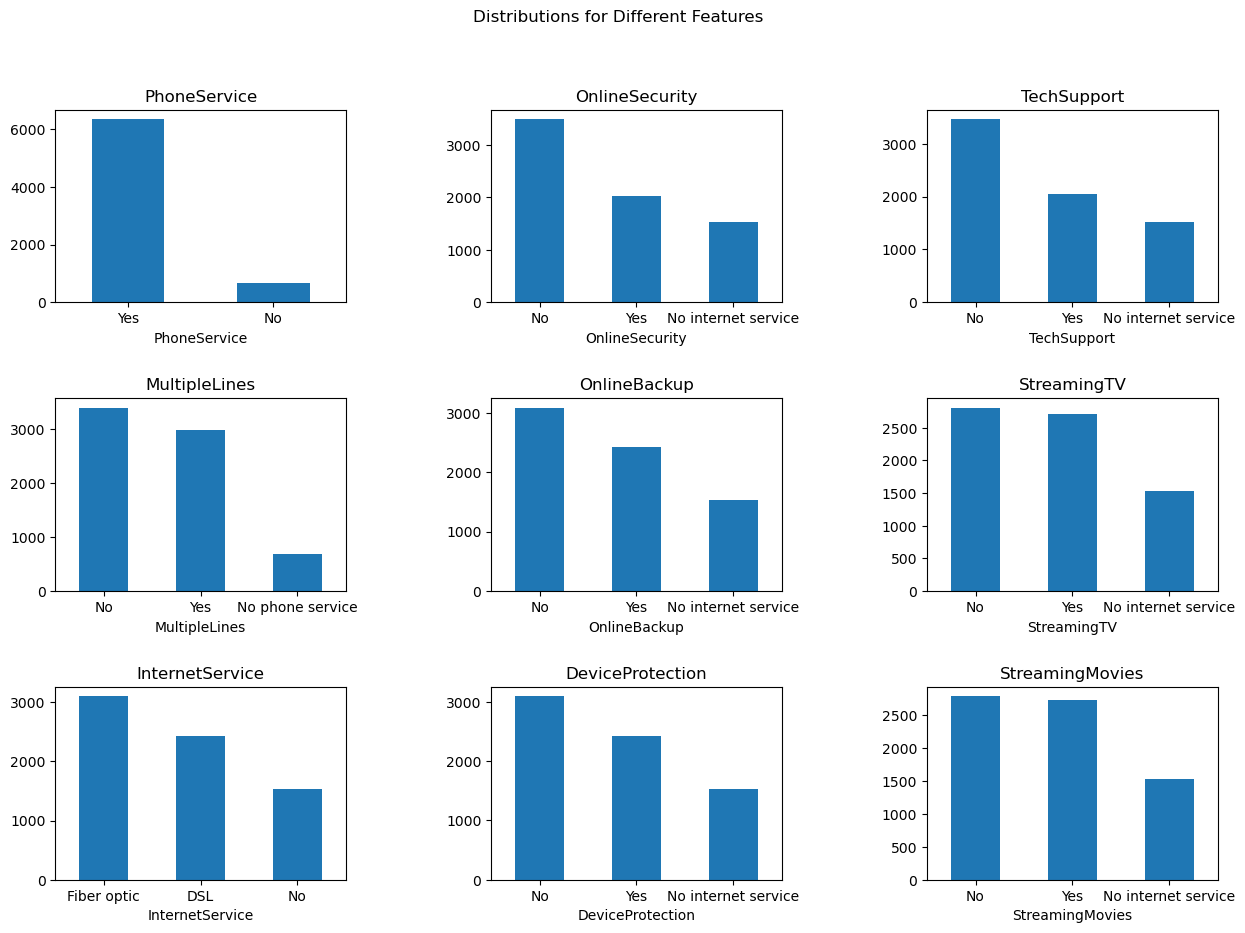

In [24]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,10))
fig.suptitle('Distributions for Different Features')
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust space between subplots
plt.show()

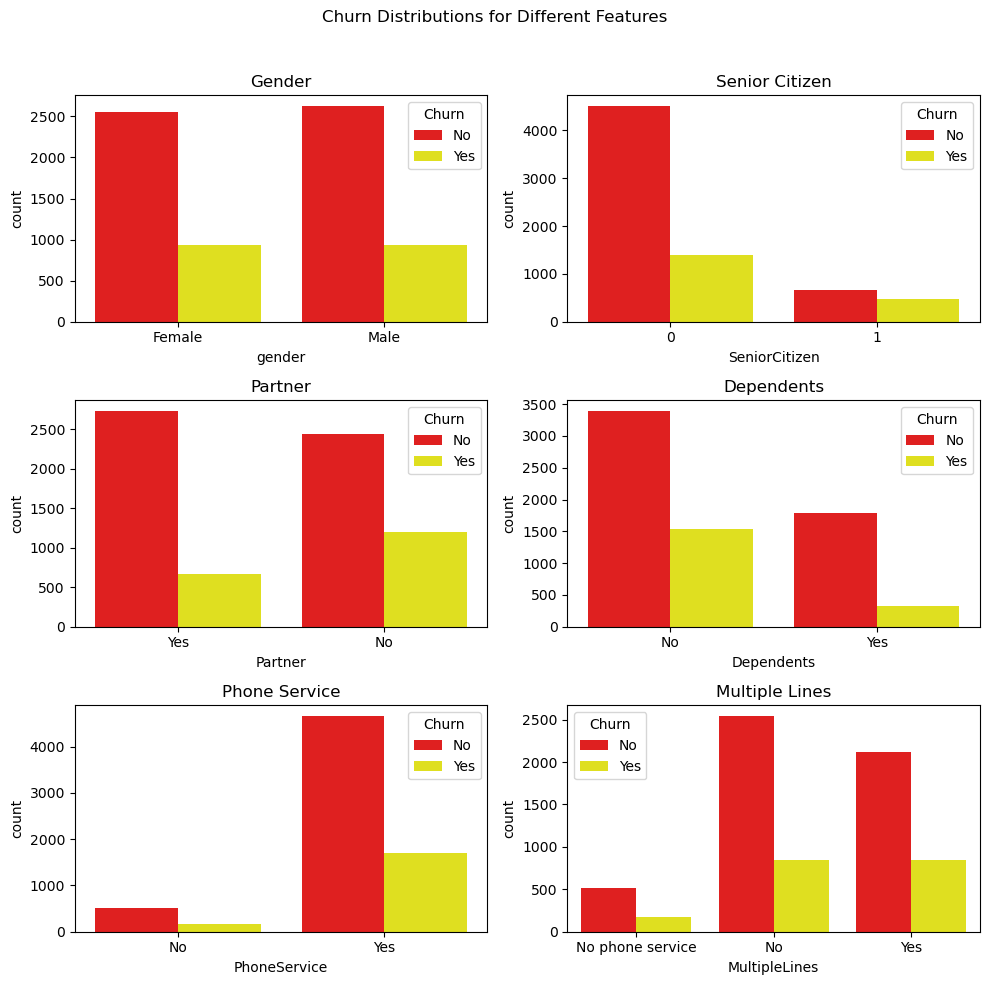

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
# If 'Churn' is not binary, you may need to adjust the palette
churn_palette = {'No': 'red', 'Yes': 'yellow'}

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
fig.suptitle('Churn Distributions for Different Features')

# Plot 'gender'
sns.countplot(x='gender', hue='Churn', data=df, palette=churn_palette, ax=axes[0, 0])
axes[0, 0].set_title('Gender')

# Plot 'SeniorCitizen'
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette=churn_palette, ax=axes[0, 1])
axes[0, 1].set_title('Senior Citizen')

# Plot 'Partner'
sns.countplot(x='Partner', hue='Churn', data=df, palette=churn_palette, ax=axes[1, 0])
axes[1, 0].set_title('Partner')

# Plot 'Dependents'
sns.countplot(x='Dependents', hue='Churn', data=df, palette=churn_palette, ax=axes[1, 1])
axes[1, 1].set_title('Dependents')

# Plot 'PhoneService'
sns.countplot(x='PhoneService', hue='Churn', data=df, palette=churn_palette, ax=axes[2, 0])
axes[2, 0].set_title('Phone Service')

# Plot 'MultipleLines'
sns.countplot(x='MultipleLines', hue='Churn', data=df, palette=churn_palette, ax=axes[2, 1])
axes[2, 1].set_title('Multiple Lines')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


Gender - The churn percent is almost equal in case of Male and Females
The percent of churn is higher in case of senior citizens
Customers with Partners and Dependents have lower churn rate as compared to those who don't have partners & Dependents.

Data PreProcessing

In [26]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [27]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [28]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
X_train, X_temp, y_train, y_temp = train_test_split(df.drop(columns=['Churn']), df['Churn'].values, test_size=0.3, random_state=40, stratify=df['Churn'])

# Step 2: Split temp into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=40, stratify=y_temp)

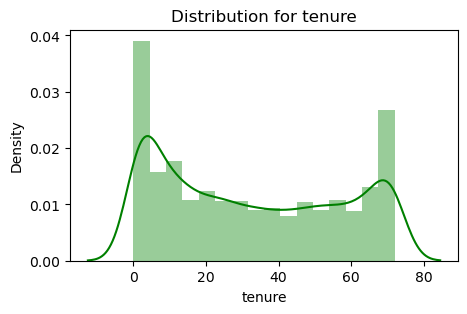

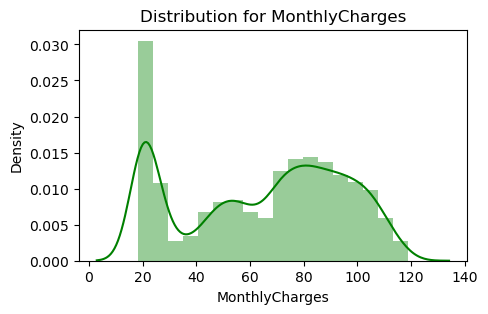

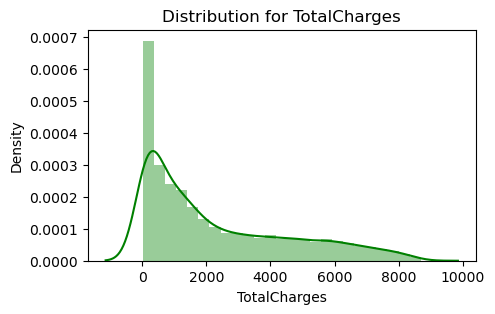

In [29]:
def distplot(feature, frame, color='g'):
    plt.figure(figsize=(5,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

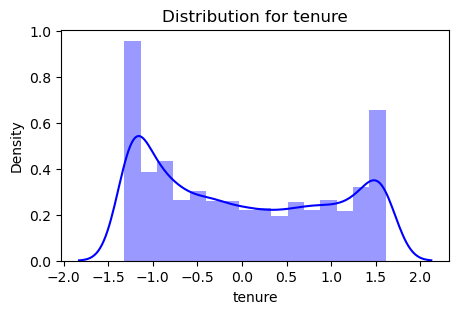

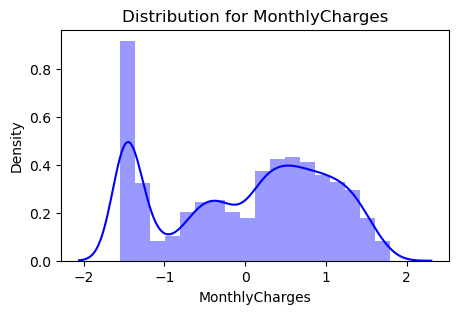

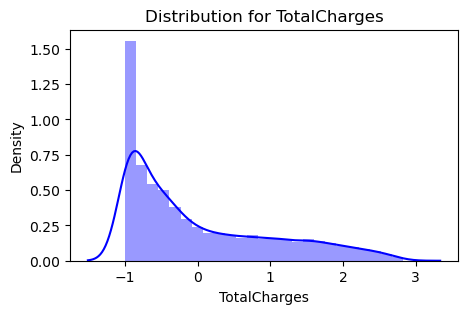

In [30]:
#Standardization of numerical attritibutes
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='b')

In [32]:
scaler= StandardScaler()
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']
num_cols = list(X_train.select_dtypes(include=['number']).columns)
cat_cols_le = list(set(X_train.columns) - set(num_cols) - set(cat_cols_ohe))

# Step 3: Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat_ohe', OneHotEncoder(drop='first'), cat_cols_ohe),
        ('cat_le', LabelEncoder(), cat_cols_le)
    ])
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_validation[num_cols] = scaler.transform(X_validation[num_cols])
#y_validation[num_cols] = scaler.transform(y_validation[num_cols])
# Step 4: Fit and transform the training set
X_train = preprocessor.fit_transform(X_train)

# Step 5: Transform the validation and test sets using the same transformer
X_validation = preprocessor.transform(X_validation)
X_test = preprocessor.transform(X_test)

Machine Learning Model Evaluations and Predictions:

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.model_selection import train_test_split

In [35]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy', refit=True)
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_
svm_predicted_y = best_svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, svm_predicted_y)
confusion_svm = confusion_matrix(y_test, svm_predicted_y)
svm_predicted_y_validation = best_svm_model.predict(X_validation)

# Evaluate the best model on the validation set
accuracy_svm_validation = accuracy_score(y_validation, svm_predicted_y_validation)
confusion_svm_validation = confusion_matrix(y_validation, svm_predicted_y_validation)

print("SVM validation accuracy " ,accuracy_svm_validation)
print("SVM test accuracy :" ,accuracy_svm)

SVM validation accuracy  0.7945075757575758
SVM test accuracy : 0.7928098391674551


In [36]:
# Logistic Regression
lr_model = LogisticRegression()
lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy', refit=True)
lr_grid_search.fit(X_train, y_train)
best_lr_model = lr_grid_search.best_estimator_
lr_predicted_y = best_lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, lr_predicted_y)
confusion_lr = confusion_matrix(y_test, lr_predicted_y)
lr_predicted_y_validation = best_lr_model.predict(X_validation)

# Evaluate the best model on the validation set
accuracy_lr_validation = accuracy_score(y_validation, lr_predicted_y_validation)
confusion_lr_validation = confusion_matrix(y_validation, lr_predicted_y_validation)

print("LR validation accuracy :" ,accuracy_lr_validation)
print("LR test accuracy :" ,accuracy_lr)

LR validation accuracy : 0.7926136363636364
LR test accuracy : 0.7918637653736992


In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Random Forest
rf_model = RandomForestClassifier()  # Create a new instance
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}
rf_grid_search =RandomizedSearchCV(rf_model, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', refit=True, random_state=42)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
rf_predicted_y = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_predicted_y)
confusion_rf = confusion_matrix(y_test, rf_predicted_y)

rf_predicted_y_validation = best_rf_model.predict(X_validation)

# Evaluate the best model on the validation set
accuracy_rf_validation = accuracy_score(y_validation, rf_predicted_y_validation)
confusion_rf_validation = confusion_matrix(y_validation, rf_predicted_y_validation)

print("RF validation accuracy :" ,accuracy_rf_validation)
print("RF test accuracy :" ,accuracy_rf)

RF validation accuracy : 0.8068181818181818
RF test accuracy : 0.7795648060548723


Feature Extraction:

In [43]:
best_rf_model = rf_grid_search.best_estimator_

# Access feature importances from the best model
importances = best_rf_model.feature_importances_

# Check the number of features in DataFrame X
print("Number of features in X:", len(X.columns))

# Print the feature importances obtained from the Random Forest model
print("Length of feature importances:", len(importances))

# Print out the feature importances and corresponding feature names
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Number of features in X: 19
Length of feature importances: 26
Feature: gender, Importance: 0.01643005931199543
Feature: SeniorCitizen, Importance: 0.01273203662799254
Feature: Partner, Importance: 0.012750886460906934
Feature: Dependents, Importance: 0.010451088587988815
Feature: tenure, Importance: 0.15155880353098033
Feature: PhoneService, Importance: 0.004711425632975033
Feature: MultipleLines, Importance: 0.016768457263803875
Feature: InternetService, Importance: 0.019055061439880224
Feature: OnlineSecurity, Importance: 0.07185725206833539
Feature: OnlineBackup, Importance: 0.021378926226772003
Feature: DeviceProtection, Importance: 0.01467102490673993
Feature: TechSupport, Importance: 0.04707377025777374
Feature: StreamingTV, Importance: 0.014258039543127368
Feature: StreamingMovies, Importance: 0.015313613353583295
Feature: Contract, Importance: 0.1307502686276235
Feature: PaperlessBilling, Importance: 0.01913062021820595
Feature: PaymentMethod, Importance: 0.020999798485059288
F

Evaluations:

In [39]:
print("\n----- Best SVM Results -----")
# Calculate MSE and RMSE
mse_svm = mean_squared_error(y_test, svm_predicted_y)
rmse_svm = mean_squared_error(y_test, svm_predicted_y, squared=False)  # Set squared=False for RMSE

# Calculate MAE
mae_svm = mean_absolute_error(y_test, svm_predicted_y)

TN, FP, FN, TP = confusion_svm.ravel()
specificity_svm = TN / (TN + FP)
print("Specificity:",specificity_svm)
print(f"Best SVM Parameters: {svm_grid_search.best_params_}")
print("Confusion Matrix:")
print(confusion_svm)
print("Classification Report:")
print(classification_report(y_test, svm_predicted_y))

print(f"Accuracy: {accuracy_svm:.4f}")



----- Best SVM Results -----
Specificity: 0.8865979381443299
Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Confusion Matrix:
[[688  88]
 [131 150]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       776
           1       0.63      0.53      0.58       281

    accuracy                           0.79      1057
   macro avg       0.74      0.71      0.72      1057
weighted avg       0.78      0.79      0.79      1057

Accuracy: 0.7928


In [40]:
print("\n----- Best Logistic Regression Results -----")
# Calculate MSE and RMSE
mse_lr = mean_squared_error(y_test, lr_predicted_y)
rmse_lr = mean_squared_error(y_test, lr_predicted_y, squared=False)  # Set squared=False for RMSE

# Calculate MAE
mae_lr = mean_absolute_error(y_test, lr_predicted_y)

print("Confusion Matrix:")
print(confusion_lr)
TN, FP, FN, TP = confusion_lr.ravel()
specificity_lr = TN / (TN + FP)
print("Specificity:",specificity_lr)
print(f"Best logistic Regression Parameters: {lr_grid_search.best_params_}")
print("Classification Report:")
print(classification_report(y_test, lr_predicted_y))

print(f"Accuracy: {accuracy_lr:.4f}")



----- Best Logistic Regression Results -----
Confusion Matrix:
[[681  95]
 [125 156]]
Specificity: 0.8775773195876289
Best logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       776
           1       0.62      0.56      0.59       281

    accuracy                           0.79      1057
   macro avg       0.73      0.72      0.72      1057
weighted avg       0.79      0.79      0.79      1057

Accuracy: 0.7919


In [44]:
print("\n----- Best Random Forest Model Results -----")
mse_rf = mean_squared_error(y_test, rf_predicted_y)
rmse_rf = mean_squared_error(y_test, rf_predicted_y, squared=False)  # Set squared=False for RMSE

# Calculate MAE
mae_rf = mean_absolute_error(y_test, rf_predicted_y)

print("Confusion Matrix:")
print(confusion_rf)
TN, FP, FN, TP = confusion_rf.ravel()
specificity_rf = TN / (TN + FP)
print("Specificity:",specificity_rf)
print("Best Parameters:", rf_grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, rf_predicted_y))
print(f"Accuracy: {accuracy_rf:.4f}")



----- Best Random Forest Model Results -----
Confusion Matrix:
[[683  93]
 [140 141]]
Specificity: 0.8801546391752577
Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       776
           1       0.60      0.50      0.55       281

    accuracy                           0.78      1057
   macro avg       0.72      0.69      0.70      1057
weighted avg       0.77      0.78      0.77      1057

Accuracy: 0.7796


Comparative Analysis

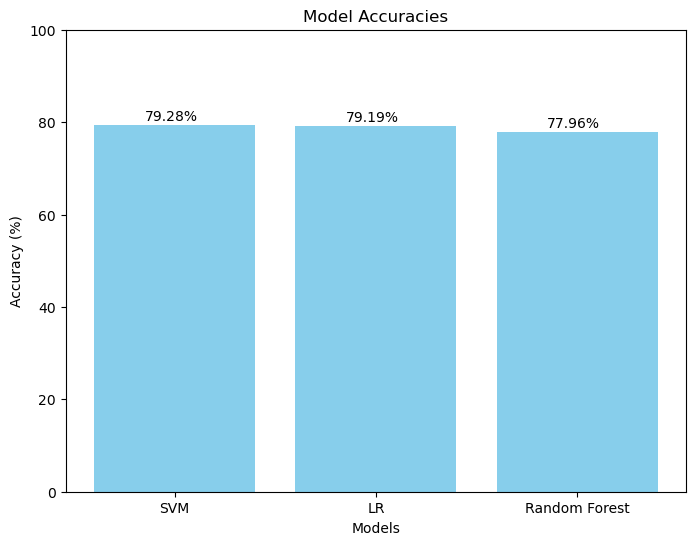

In [45]:
accuracies = {
    'SVM': accuracy_svm,
    'LR': accuracy_lr,
    'Random Forest': accuracy_rf
}

# Convert accuracy values to percentages
accuracy_values_percentage = [acc * 100 for acc in accuracies.values()]

models = list(accuracies.keys())

# Creating the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracy_values_percentage, color='skyblue')

# Adding titles and labels
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Setting y-axis limits from 0 to 100 for percentage range

# Adding percentages on top of the bars
for bar, acc_percentage in zip(bars, accuracy_values_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'{acc_percentage:.2f}%', fontsize=10, color='black')

# Display the plot
plt.show()


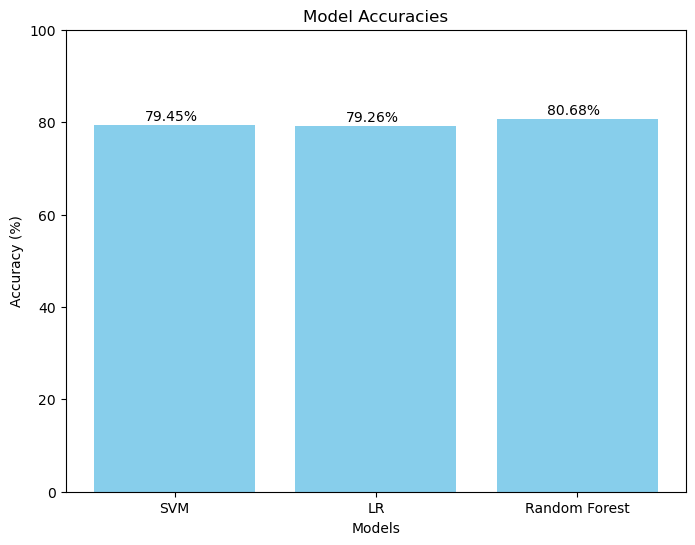

In [46]:
accuracies = {
    'SVM': accuracy_svm_validation,
    'LR': accuracy_lr_validation,
    'Random Forest': accuracy_rf_validation
}

# Convert accuracy values to percentages
accuracy_values_percentage = [acc * 100 for acc in accuracies.values()]

models = list(accuracies.keys())

# Creating the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracy_values_percentage, color='skyblue')

# Adding titles and labels
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Setting y-axis limits from 0 to 100 for percentage range

# Adding percentages on top of the bars
for bar, acc_percentage in zip(bars, accuracy_values_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'{acc_percentage:.2f}%', fontsize=10, color='black')

# Display the plot
plt.show()
